# Ensemble scores
after 5,000 years and 12,000years, including historic simulation for comparison

In [1]:
# run using source activate py3skfmm
import sys; print(sys.executable)

/home/reese/.conda/envs/py3skfmm/bin/python


In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png',}
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sys, os
import pandas as pd
import glob
import collections
import seaborn as sns
import importlib

plotlibp = "/home/reese/projects/MIPs/ismip6/pism-plotting"
if plotlibp not in sys.path: sys.path.append(plotlibp)
import pism_timeseries as pt; importlib.reload(pt)
import pism_spatial as ps; importlib.reload(ps)

# our custom imports
if "../" not in sys.path: sys.path.append("../")
import pism_ens_analysis.timeseries as ts; importlib.reload(ts)
import pism_ens_analysis.pism_ens_analysis as ea; importlib.reload(ea)


<module 'pism_ens_analysis.pism_ens_analysis' from '../pism_ens_analysis/pism_ens_analysis.py'>

In [4]:
plt.rcParams['figure.figsize'] = 16,14
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.major.pad'] = 10
plt.rcParams['font.sans-serif'] = [u"Liberation Sans"] + plt.rcParams['font.sans-serif']
plt.rcParams['svg.fonttype'] = 'none'

sns.set_context('paper', rc={'text.usetex' : True}, font_scale=1.4)

In [5]:
ensemble_id  = "pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7"

grid_id = "initmip8km"
input_root_dir = "/home/reese/projects/MIPs/ismip6"
resolution = 8 # in km

data_path = "/p/tmp/reese/pism_out"

#Old: does not work with new runs anymore 
# experiments = glob.glob(os.path.join(data_path, ensemble_id+"_*"))
experiments = [
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_7a241540_historicalnoresm85_NewOcean',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_a9322a16',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_e2af1416',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_e4b3ad55',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_858c5e68',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_b239bbbf',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_ebca421f',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_96ef4d73',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_b557e5f9',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_7a241540',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_7771a44f',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_f6778fec',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_4ebb5440',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_599ef7eb',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_b8136558',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_8c119642',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_f10bf1e0',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_a9024150',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_43622ad7',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_ac1dfeed',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_6d1d00da',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_33521d6a',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_84064ed9',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_1289140d',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_37520409',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_0084991e',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_1bc42213',
 '/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_25c07e5d']

In [7]:
tsdata = collections.OrderedDict()
for em in experiments:
    print(em)
    try:
        tsdata[em.split("/")[-1]] = pt.get_timeseries_data(em)
    except IOError:
        continue

/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_7a241540_historicalnoresm85_NewOcean
/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_a9322a16
/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_e2af1416
/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_e4b3ad55
/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_858c5e68
/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_b239bbbf
/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_ebca421f
/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_

# Calculate ensemble indicators

In [8]:
# read the parameter table for the ensemble
ensemble_table = pd.read_csv("/home/reese/projects/pism_buttressing/pism-run/sets/"+ensemble_id+".txt",
                             sep='\s+',index_col=0)
ensemble_table

,ocean.pico.overturning_coefficent,ocean.pico.heat_exchange_coefficent,basal_yield_stress.mohr_coulomb.topg_to_phi.phi_min,basal_yield_stress.mohr_coulomb.topg_to_phi.phi_max,basal_yield_stress.mohr_coulomb.topg_to_phi.topg_min,basal_yield_stress.mohr_coulomb.topg_to_phi.topg_max
hash,,,,,,
e4b3ad55,500000.0,0.00001,2.0,50.0,-700.0,500.0
43622ad7,500000.0,0.00002,2.0,50.0,-700.0,500.0
b557e5f9,500000.0,0.00003,2.0,50.0,-700.0,500.0
4ebb5440,1000000.0,0.00001,2.0,50.0,-700.0,500.0
a9024150,1000000.0,0.00002,2.0,50.0,-700.0,500.0
7a241540,1000000.0,0.00003,2.0,50.0,-700.0,500.0
96ef4d73,2000000.0,0.00001,2.0,50.0,-700.0,500.0
0084991e,2000000.0,0.00002,2.0,50.0,-700.0,500.0
1bc42213,2000000.0,0.00003,2.0,50.0,-700.0,500.0


In [9]:
## get the reference data for a specific grid.
input_root_dir = "/p/projects/pism/mengel/pism_input"
bedm_mask, bedm_thk, bedm_thk_grounded, basins, rignot_velsurf_mag = \
    ea.get_reference_data(input_root_dir, grid_id)
    
rigmag_grounded_above100 = ea.get_data_on_maskval_above_threshold(rignot_velsurf_mag, bedm_mask, 0, 100)
distance_to_observed_gl = ea.get_distance_to_observed_gl(bedm_mask, resolution)

In [10]:
# main functionality: get the quality indicators for each run.

def get_ens_indicator(experiment, year):
    print('calc indicators')
    ensemble_indicator = pd.Series(index = [
       'RMSE Amundsen Stream Velocity', 'RMSE Ross Stream Velocity', 'RMSE FRIS Stream Velocity','RMSE Antarctic Stream Velocity',
       'RMSE Amundsen Thk Anomaly', 'RMSE Ross Thk Anomaly', 'RMSE FRIS Thk Anomaly',
       'RMSE Antarctic Thk Anomaly', 
        'DEV Antarctic Grounded Area', 
       'DEV Antarctic Floating Area', 'DEV Amundsen Grounded Area',
       'DEV Amundsen Floating Area', 'DEV Ross Grounded Area', 
       'DEV Ross Floating Area',  'DEV FRIS Grounded Area',
       'DEV FRIS Floating Area', 'DIFF Antarctic Grounding Line',
       'DIFF Amundsen Grounding Line', 'DIFF Ross Grounding Line', 'DIFF FRIS Grounding Line'])

    ehash = experiment.split("_")[-1]
    print (ehash, year)

    try:
        pism_data = ea.get_spatial_variables(
            os.path.join(experiment,"extra_"+str(year)+".000.nc"),["velsurf_mag","thk","mask"])
    except IOError as error:
        try: # For the historic simulation
                pism_data = ea.get_spatial_variables_lasttime(
                    os.path.join(experiment,"extra.nc"),["velsurf_mag","thk","mask"])
        except IOError as error:
            return ehash, year, ensemble_indicator
        
    
    # 1) RMSE to observed velocities
    # RMSE = sqrt( sum( (x-y)^2) / number of data points )
    pismvel_above100 = ea.get_data_on_maskval_above_threshold(
        pism_data["velsurf_mag"], bedm_mask, 0, 100)
    sd_vel = (rigmag_grounded_above100-pismvel_above100)**2.
    velrms_per_basin = np.sqrt(ea.get_sum_per_basin(sd_vel, basins, basin_range=[1,12,14],weigh_by_size=True) )

    # 2) RMSE to observed ice thickness (grounded)
    sd_thk_gr = (pism_data["thk"] - bedm_thk_grounded)**2. 
    thkrms_per_basin = np.sqrt(ea.get_sum_per_basin(sd_thk_gr, basins, basin_range=[1,12,14], weigh_by_size=True))
    
    # 3) Error in grounded / floatin area compared to observations
    area_errors = ea.get_area_errors(pism_data["mask"], bedm_mask, resolution)

    garea_err_per_basin = ea.get_sum_per_basin(
        area_errors["grounded_area_error"], basins, basin_range=[1,12,14])
    farea_err_per_basin = ea.get_sum_per_basin(
        area_errors["floating_area_error"], basins, basin_range=[1,12,14])
    
    # 4) deviation in the grounding line position (mean over the minimum distance to the original grounding line)
    gl_deviation = ea.get_grounding_line_deviaton(
        pism_data["mask"], distance_to_observed_gl, basins, basin_range=[1,12,14])
    
    # Ensemble indicators:
    ensemble_indicator.loc["RMSE Amundsen Stream Velocity"] = \
        velrms_per_basin.loc[14]
    ensemble_indicator.loc["RMSE Ross Stream Velocity"] = \
        velrms_per_basin.loc[12]
    ensemble_indicator.loc["RMSE FRIS Stream Velocity"] = \
        velrms_per_basin.loc[1]
    ensemble_indicator.loc["RMSE Antarctic Stream Velocity"] = \
        np.sqrt(sd_vel.sum()/(pismvel_above100>0).sum())
        
    ensemble_indicator.loc["RMSE Amundsen Thk Anomaly"] = \
        thkrms_per_basin.loc[14]
    ensemble_indicator.loc["RMSE Ross Thk Anomaly"] = \
        thkrms_per_basin.loc[12]
    ensemble_indicator.loc["RMSE FRIS Thk Anomaly"] = \
        thkrms_per_basin.loc[1]
    ensemble_indicator.loc["RMSE Antarctic Thk Anomaly"] = \
        np.sqrt(sd_thk_gr.sum()/(bedm_thk_grounded>0).sum())
        #np.sqrt(sd_thk_gr.sum()/(basins>0).sum())

    ensemble_indicator.loc["DEV Antarctic Grounded Area"] = \
        area_errors["grounded_area_error"].sum()
    ensemble_indicator.loc["DEV Antarctic Floating Area"] = \
        area_errors["floating_area_error"].sum()
    ensemble_indicator.loc["DEV Amundsen Grounded Area"] = \
        garea_err_per_basin.loc[14]
    ensemble_indicator.loc["DEV Amundsen Floating Area"] = \
        farea_err_per_basin.loc[14]
    ensemble_indicator.loc["DEV Ross Grounded Area"] = \
        garea_err_per_basin.loc[12]
    ensemble_indicator.loc["DEV Ross Floating Area"] = \
        farea_err_per_basin.loc[12]
    ensemble_indicator.loc["DEV FRIS Grounded Area"] = \
        garea_err_per_basin.loc[1]
    ensemble_indicator.loc["DEV FRIS Floating Area"] = \
        farea_err_per_basin.loc[1]
        
    ensemble_indicator.loc["DIFF Antarctic Grounding Line"] = \
        gl_deviation.loc["total"]
    ensemble_indicator.loc["DIFF Amundsen Grounding Line"] = \
        gl_deviation.loc[14]
    ensemble_indicator.loc["DIFF Ross Grounding Line"] = \
        gl_deviation.loc[12]
    ensemble_indicator.loc["DIFF FRIS Grounding Line"] = \
        gl_deviation.loc[1]    
    
    return ehash, year, ensemble_indicator

532900

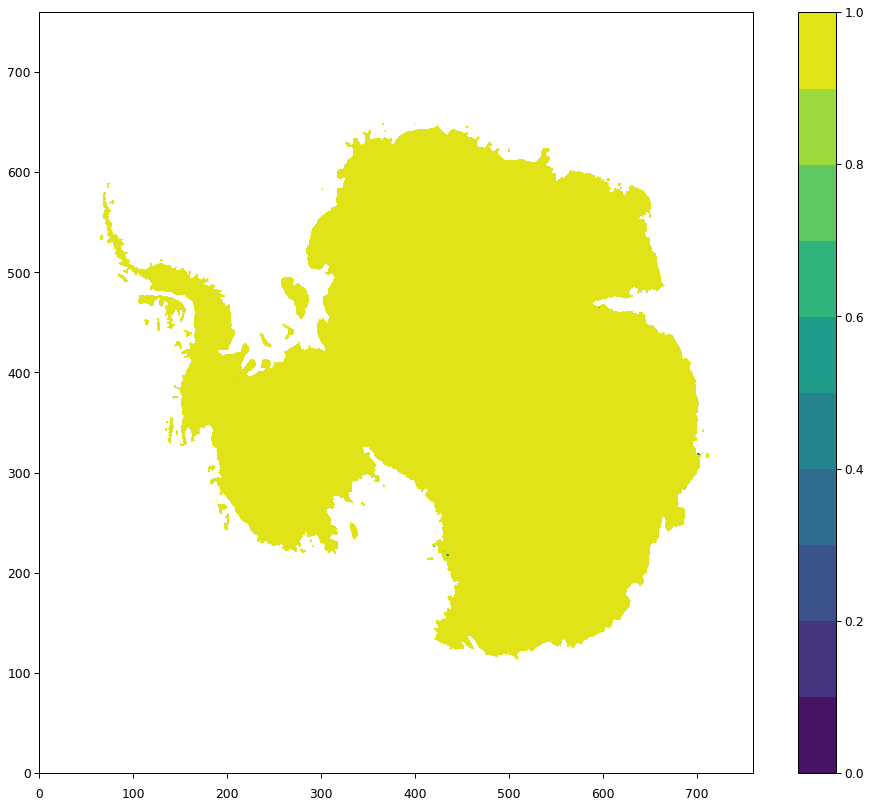

In [154]:
pism_data = ea.get_spatial_variables_lasttime(
                    os.path.join(experiments[0],"extra.nc"),["velsurf_mag","thk","mask"])

pismvel_above100 = ea.get_data_on_maskval_above_threshold(
        pism_data["velsurf_mag"], bedm_mask, 0, 100)
sd_vel = (rigmag_grounded_above100-pismvel_above100)**2.

plt.figure()
plt.contourf(bedm_thk_grounded>0, levels=np.linspace(0,1,11))
plt.colorbar()


(bedm_thk_grounded>0).sum()

(basins>0).sum()

In [11]:
# Calculate indicators for the last year, individual years are possible

#import joblib
#years = [107500] #np.arange(1000,2000,100)
#ensemble_indicators_par = joblib.Parallel(n_jobs=12)(
#    joblib.delayed(get_ens_indicator)(e, y) for e in experiments_selected[:] for y in years)

ensemble_indicators_par=[get_ens_indicator(e,y) for e in experiments for y in [105000,112000]]
#ensemble_indicators_par=[get_ens_indicator(e,110000) for e in experiments ]


calc indicators
NewOcean 105000


<ipython-input-10-9adad62a5698>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ensemble_indicator = pd.Series(index = [
../pism_ens_analysis/pism_ens_analysis.py:227: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(gldist**2.).sum() / (gldist != 0).sum()


calc indicators
NewOcean 112000
calc indicators
a9322a16 105000
calc indicators
a9322a16 112000
calc indicators
e2af1416 105000
calc indicators
e2af1416 112000
calc indicators
e4b3ad55 105000
calc indicators
e4b3ad55 112000
calc indicators
858c5e68 105000
calc indicators
858c5e68 112000
calc indicators
b239bbbf 105000
calc indicators
b239bbbf 112000
calc indicators
ebca421f 105000
calc indicators
ebca421f 112000
calc indicators
96ef4d73 105000
calc indicators
96ef4d73 112000
calc indicators
b557e5f9 105000
calc indicators
b557e5f9 112000
calc indicators
7a241540 105000
calc indicators
7a241540 112000
calc indicators
7771a44f 105000
calc indicators
7771a44f 112000
calc indicators
f6778fec 105000
calc indicators
f6778fec 112000
calc indicators
4ebb5440 105000
calc indicators
4ebb5440 112000
calc indicators
599ef7eb 105000
calc indicators
599ef7eb 112000
calc indicators
b8136558 105000
calc indicators
b8136558 112000
calc indicators
8c119642 105000
calc indicators
8c119642 112000
calc ind

In [164]:
ensemble_indicators_par

[('NewOcean',
  105000,
  RMSE Amundsen Stream Velocity        113.349742
  RMSE Ross Stream Velocity             34.962975
  RMSE FRIS Stream Velocity             47.355356
  RMSE Antarctic Stream Velocity       290.123144
  RMSE Amundsen Thk Anomaly            166.452136
  RMSE Ross Thk Anomaly                187.693682
  RMSE FRIS Thk Anomaly                166.929119
  RMSE Antarctic Thk Anomaly           250.327205
  DEV Antarctic Grounded Area       713344.000000
  DEV Antarctic Floating Area       575232.000000
  DEV Amundsen Grounded Area         15936.000000
  DEV Amundsen Floating Area         10304.000000
  DEV Ross Grounded Area             76608.000000
  DEV Ross Floating Area             88128.000000
  DEV FRIS Grounded Area             76608.000000
  DEV FRIS Floating Area             67648.000000
  DIFF Antarctic Grounding Line         17.081930
  DIFF Amundsen Grounding Line          11.799294
  DIFF Ross Grounding Line              23.544329
  DIFF FRIS Grounding Line

In [13]:
ensemble_indicators = pd.DataFrame({(el[0], el[1]): el[2] for el in ensemble_indicators_par}).T
ensemble_indicators = ensemble_indicators.dropna(axis=0)
ensemble_indicators.index.names = ["ehash", "year"]
ensemble_indicators.columns.names = ["indicator"]
ensemble_indicators.to_csv(os.path.join(ensemble_id+"_all.csv"))

In [14]:
# read again
#ensemble_indicators = pd.read_csv("../data/"+ensemble_id+"_all.csv",index_col=[0,1])
ensemble_indicators = pd.read_csv(ensemble_id+"_all.csv",index_col=[0,1])

print(ensemble_indicators[:])


                 RMSE Amundsen Stream Velocity  RMSE Ross Stream Velocity  \
ehash    year                                                               
NewOcean 105000                     113.349742                  34.962975   
         112000                     113.349742                  34.962975   
a9322a16 105000                     154.039782                  34.697149   
e2af1416 105000                     131.319087                  33.373901   
e4b3ad55 105000                     114.748773                  36.902154   
         112000                     113.674206                  32.939708   
858c5e68 105000                     129.071693                  35.820878   
b239bbbf 105000                     127.648641                  32.920389   
ebca421f 105000                     127.731685                  36.725478   
96ef4d73 105000                     114.958626                  35.986554   
         112000                     115.115764                  35.069593   

In [15]:
def get_best_total(ens_ind, name=None):
    
    """ combine scores to  a total indicator and 
        sort that lowest value ("best run") comes first."""

    # take the 'Grounded Area' indicators out, they are highly correlated to grounding line.
    #drop_these = [ind for ind in ens_ind.columns if "Grounded Area" in ind]
    #ens_ind = ens_ind.drop(drop_these,axis=1)
    # Remove velocities
    #drop_these = [ind for ind in ens_ind.columns if "Velocity" in ind]
    #ens_ind = ens_ind.drop(drop_these,axis=1)

    if name is not None:
        cols = [ind for ind in ens_ind.columns if name in ind ]
    else:
        cols = ens_ind.columns
        
    total_ind = ens_ind.loc[:,cols].product(axis=1,skipna=False)
    print(ens_ind.loc[:,cols].columns)
    return total_ind.sort_values()

In [16]:
# divide each ensemble member by the median of the ensemble for a certain indicator.
# after this normalization, runs smaller 1 score better than the median
normalized_ens_indicator = ensemble_indicators.div(ensemble_indicators.median(axis=0),axis=1)

normalized_ens_indicator = normalized_ens_indicator.sort_index(axis=0)
#normalized_ens_indicator = normalized_ens_indicator.loc[(slice(None),slice(0,100000)),:]

runs_with_data = normalized_ens_indicator.index.get_level_values(0).unique()

In [17]:
total = get_best_total(normalized_ens_indicator)
amundsen = get_best_total(normalized_ens_indicator,"Amundsen")
ross = get_best_total(normalized_ens_indicator,"Ross")
fris = get_best_total(normalized_ens_indicator,"FRIS")
thickness = get_best_total(normalized_ens_indicator,"Thk")
area = get_best_total(normalized_ens_indicator,"Area")
groundingline = get_best_total(normalized_ens_indicator,"Grounding")
velocity =  get_best_total(normalized_ens_indicator,"Velocity")
aisonly =  get_best_total(normalized_ens_indicator,"Antarctic")

Index(['RMSE Amundsen Stream Velocity', 'RMSE Ross Stream Velocity',
       'RMSE FRIS Stream Velocity', 'RMSE Antarctic Stream Velocity',
       'RMSE Amundsen Thk Anomaly', 'RMSE Ross Thk Anomaly',
       'RMSE FRIS Thk Anomaly', 'RMSE Antarctic Thk Anomaly',
       'DEV Antarctic Grounded Area', 'DEV Antarctic Floating Area',
       'DEV Amundsen Grounded Area', 'DEV Amundsen Floating Area',
       'DEV Ross Grounded Area', 'DEV Ross Floating Area',
       'DEV FRIS Grounded Area', 'DEV FRIS Floating Area',
       'DIFF Antarctic Grounding Line', 'DIFF Amundsen Grounding Line',
       'DIFF Ross Grounding Line', 'DIFF FRIS Grounding Line'],
      dtype='object')
Index(['RMSE Amundsen Stream Velocity', 'RMSE Amundsen Thk Anomaly',
       'DEV Amundsen Grounded Area', 'DEV Amundsen Floating Area',
       'DIFF Amundsen Grounding Line'],
      dtype='object')
Index(['RMSE Ross Stream Velocity', 'RMSE Ross Thk Anomaly',
       'DEV Ross Grounded Area', 'DEV Ross Floating Area',
       '

In [171]:
print(total[0:5])

ehash     year  
7a241540  112000    0.183308
NewOcean  105000    0.190277
          112000    0.190277
b557e5f9  105000    0.208797
7a241540  105000    0.209725
dtype: float64


In [172]:
print(amundsen[0:5])

ehash     year  
NewOcean  105000    0.441606
          112000    0.441606
1bc42213  105000    0.515689
b239bbbf  105000    0.603616
7a241540  112000    0.613362
dtype: float64


In [173]:
print(ross[0:5])

ehash     year  
b557e5f9  112000    0.360885
43622ad7  112000    0.375478
7a241540  112000    0.441455
e4b3ad55  112000    0.443155
NewOcean  112000    0.486477
dtype: float64


In [174]:
print(fris[0:5])

ehash     year  
e4b3ad55  105000    0.567205
7a241540  105000    0.581940
a9024150  105000    0.714777
ebca421f  105000    0.721312
8c119642  105000    0.731536
dtype: float64


In [175]:
print(thickness[0:5])

ehash     year  
43622ad7  105000    0.502972
4ebb5440  105000    0.502984
b557e5f9  105000    0.503314
e4b3ad55  105000    0.505851
7a241540  105000    0.525139
dtype: float64


In [176]:
print(area[0:5])

ehash     year  
NewOcean  112000    0.334695
          105000    0.334695
7a241540  112000    0.396426
e4b3ad55  112000    0.535266
b557e5f9  112000    0.541053
dtype: float64


In [177]:
print(velocity[0:5])

ehash     year  
e4b3ad55  112000    0.761787
4ebb5440  112000    0.784058
43622ad7  112000    0.787137
b557e5f9  112000    0.804894
43622ad7  105000    0.853859
dtype: float64


In [178]:
print(groundingline[0:5])

ehash     year  
NewOcean  112000    0.545851
          105000    0.545851
b557e5f9  112000    0.601128
8c119642  105000    0.630814
7a241540  112000    0.638080
dtype: float64


In [182]:
print(aisonly[0:5])

ehash     year  
b557e5f9  105000    0.747272
43622ad7  105000    0.748711
e4b3ad55  105000    0.749023
a9024150  105000    0.773105
e4b3ad55  112000    0.777280
dtype: float64


# Create Figures

In [18]:
def get_indicators_for_year(ens_indicator, year):
    
    ensind_year = ens_indicator.loc[(slice(None),year),:]
    ensind_year.index = ensind_year.index.droplevel(1)
    return ensind_year

indicators_5000 = get_indicators_for_year(normalized_ens_indicator, 105000)
indicators_12000 = get_indicators_for_year(normalized_ens_indicator, 112000)


In [23]:
normalized_ens_indicator_yr = indicators_5000.div(indicators_5000.median(axis=0),axis=1)
normalized_ens_indicator_yr = normalized_ens_indicator_yr.sort_index(axis=0)

total_yr5 = get_best_total(normalized_ens_indicator_yr)


normalized_ens_indicator_yr = indicators_12000.div(indicators_12000.median(axis=0),axis=1)
normalized_ens_indicator_yr = normalized_ens_indicator_yr.sort_index(axis=0)

total_yr12 = get_best_total(normalized_ens_indicator_yr)

Index(['RMSE Amundsen Stream Velocity', 'RMSE Ross Stream Velocity',
       'RMSE FRIS Stream Velocity', 'RMSE Antarctic Stream Velocity',
       'RMSE Amundsen Thk Anomaly', 'RMSE Ross Thk Anomaly',
       'RMSE FRIS Thk Anomaly', 'RMSE Antarctic Thk Anomaly',
       'DEV Antarctic Grounded Area', 'DEV Antarctic Floating Area',
       'DEV Amundsen Grounded Area', 'DEV Amundsen Floating Area',
       'DEV Ross Grounded Area', 'DEV Ross Floating Area',
       'DEV FRIS Grounded Area', 'DEV FRIS Floating Area',
       'DIFF Antarctic Grounding Line', 'DIFF Amundsen Grounding Line',
       'DIFF Ross Grounding Line', 'DIFF FRIS Grounding Line'],
      dtype='object')
Index(['RMSE Amundsen Stream Velocity', 'RMSE Ross Stream Velocity',
       'RMSE FRIS Stream Velocity', 'RMSE Antarctic Stream Velocity',
       'RMSE Amundsen Thk Anomaly', 'RMSE Ross Thk Anomaly',
       'RMSE FRIS Thk Anomaly', 'RMSE Antarctic Thk Anomaly',
       'DEV Antarctic Grounded Area', 'DEV Antarctic Floating Ar

In [24]:
total_yr12

ehash
7a241540    0.754717
NewOcean    0.783412
b557e5f9    0.945082
e4b3ad55    0.963003
43622ad7    1.144994
4ebb5440    1.300290
96ef4d73    6.657266
dtype: float64

In [20]:
newocean = pd.DataFrame(ensemble_table.loc['7a241540']).transpose()
newocean.rename(index={'7a241540':'NewOcean'},inplace=True)
ensemble_table_2 = pd.concat([ensemble_table, newocean])

<Figure size 1152x1008 with 0 Axes>

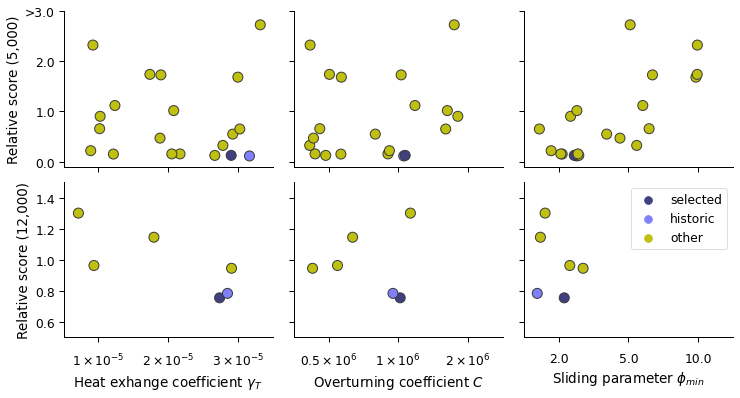

In [193]:
# plot total indicators for a given parameter
plt.clf()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6), sharey=False, sharex=False) # 12 by 12 cm
plt.subplots_adjust(wspace=0.1, hspace=0.1)

d=pd.concat([total_yr5, ensemble_table_2],axis=1).dropna(axis=1,how='all')
d = d.rename(columns={0: "score"})
d['highlight'] = 2+ np.zeros(len(d.index.values)) #np.arange(0,len(d.index.values))
d.loc[d.index=='7a241540','highlight'] = 0
d.loc[d.index=='NewOcean','highlight'] = 1

# pico gamma_T 
ax = axes[0,0]


highlight = "ocean.pico.heat_exchange_coefficent"
highlight2 = 'highlight' 

g = sns.stripplot(x=highlight, y='score', hue=highlight2, 
                 data=d, size=10, jitter=0.35, palette=sns.color_palette("gist_stern", n_colors=3),
                 edgecolor='gray', linewidth=1, ax = ax)#, dodge=True)

leg = g.axes.get_legend()
leg.remove()
    
#sns.heatmap(d)
ax.set_ylabel('Relative score (5,000)')
#ax.set_xlabel('Heat exhange coefficient $\gamma_{T}$')
ax.set_xlabel('')
ax.set_ylim([-0.1,3])
g.set(yticks=[0.0, 1.0, 2.0, 3.0])
g.set(yticklabels=[0.0, 1.0, 2.0, '>3.0'])
g.set(xticklabels=[])
#ax.set_yticks([], [])

g.set(xticklabels=[r'$1\times 10^{-5}$', r'$2\times 10^{-5}$', r'$3\times 10^{-5}$'])
sns.despine()


# pico C
ax = axes[0,1]


highlight = "ocean.pico.overturning_coefficent"
highlight2 = 'highlight' 

g = sns.stripplot(x=highlight, y='score', hue=highlight2, 
                 data=d, size=10, jitter=0.35, palette=sns.color_palette("gist_stern", n_colors=3),
                 edgecolor='gray', linewidth=1, ax = ax)#, dodge=True)

leg = g.axes.get_legend()
leg.remove()
#ax.set_xlabel('Overturning coefficient $C$')
ax.set_xlabel('')

g.set(xticklabels=[r'$0.5\times 10^{6}$', r'$1\times 10^{6}$', r'$2\times 10^{6}$'])
ax.set_ylabel('')
ax.set_ylim([-0.1,3])
g.set(yticks=[0.0, 1.0, 2.0, 3.0])
g.set(yticklabels=[])
g.set(xticklabels=[])

sns.despine()



#
ax = axes[0,2]

highlight = "basal_yield_stress.mohr_coulomb.topg_to_phi.phi_min"
highlight2 = 'highlight' 
#highlight2 = 'ocean.pico.heat_exchange_coefficent'

g = sns.stripplot(x=highlight, y='score', hue=highlight2, 
                 data=d, size=10, jitter=0.35, palette=sns.color_palette("gist_stern", n_colors=3),
                 edgecolor='gray', linewidth=1, ax=ax)#, dodge=True)

leg = g.axes.get_legend()
leg.remove()
ax.set_ylabel('')
#ax.set_xlabel('Sliding parameter $\phi_{min}$')
ax.set_xlabel('')

ax.set_ylim([-0.1,3])
g.set(yticks=[0.0, 1.0, 2.0, 3.0])
g.set(yticklabels=[])
#plt.xlabel('heat exchange coefficient')
#plt.legend(loc='right outside')
sns.despine()
g.set(xticklabels=[])



####

d=pd.concat([total_yr12, ensemble_table_2],axis=1).dropna(axis=1,how='all')
d = d.rename(columns={0: "score"})
d['highlight'] = 2+ np.zeros(len(d.index.values)) #np.arange(0,len(d.index.values))
d.loc[d.index=='7a241540','highlight'] = 0
d.loc[d.index=='NewOcean','highlight'] = 1


# pico gamma_T 
ax = axes[1,0]


highlight = "ocean.pico.heat_exchange_coefficent"
highlight2 = 'highlight' 

g = sns.stripplot(x=highlight, y='score', hue=highlight2, 
                 data=d, size=10, jitter=0.35, palette=sns.color_palette("gist_stern", n_colors=3),
                 edgecolor='gray', linewidth=1, ax = ax)#, dodge=True)

leg = g.axes.get_legend()
leg.remove()
    
ax.set_ylabel('Relative score (12,000)')
ax.set_xlabel('Heat exhange coefficient $\gamma_{T}$')
ax.set_ylim([0.5,1.5])
g.set(xticklabels=[r'$1\times 10^{-5}$', r'$2\times 10^{-5}$', r'$3\times 10^{-5}$'])
sns.despine()


# pico C
ax = axes[1,1]


highlight = "ocean.pico.overturning_coefficent"
highlight2 = 'highlight' 

g = sns.stripplot(x=highlight, y='score', hue=highlight2, 
                 data=d, size=10, jitter=0.35, palette=sns.color_palette("gist_stern", n_colors=3),
                 edgecolor='gray', linewidth=1, ax = ax)#, dodge=True)

leg = g.axes.get_legend()
leg.remove()
ax.set_xlabel('Overturning coefficient $C$')
g.set(xticklabels=[r'$0.5\times 10^{6}$', r'$1\times 10^{6}$', r'$2\times 10^{6}$'])
ax.set_ylabel('')
sns.despine()
ax.set_ylim([0.5,1.5])
g.set(yticklabels=[])

#
ax = axes[1,2]

highlight = "basal_yield_stress.mohr_coulomb.topg_to_phi.phi_min"
highlight2 = 'highlight' 
#highlight2 = 'ocean.pico.heat_exchange_coefficent'

g = sns.stripplot(x=highlight, y='score', hue=highlight2, 
                 data=d, size=10, jitter=0.35, palette=sns.color_palette("gist_stern", n_colors=3),
                 edgecolor='gray', linewidth=1)#, dodge=True)

leg = g.axes.get_legend()
leg.set_title('')

#for lh in leg.legendHandles: 
#    #lh.set_alpha(1)
#    lh._sizes = [300] 
# replace labels
new_labels = ['selected', 'historic', 'other']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
    
    
#sns.heatmap(d)
ax.set_ylabel('')
ax.set_xlabel('Sliding parameter $\phi_{min}$')
ax.set_ylim([0.5,1.5])
#plt.xlabel('heat exchange coefficient')
#plt.legend(loc='right outside')
g.set(yticklabels=[])

sns.despine()


plt.savefig('Ens_totalscore_'+ensemble_id+'_both.png', bbox_inches='tight')
plt.savefig('Ens_totalscore_'+ensemble_id+'_both.pdf', bbox_inches='tight')


plt.show()

# OLD

In [19]:
# FIXME Thickness difference to start year at 2100

varname = "thk"
start_year = 100000
analysis_year =110000

plotcols = 2

fig = plt.figure()

number_of_exps = len(experiments)
for experiment_no in np.arange(number_of_exps):
    print(experiments[experiment_no])
    
    def lm(field): return field#[400:1000,300:800] # to zoom in, does not work for different resolutions
    
    try:
        variable = ea.get_spatial_variable(os.path.join(experiments[experiment_no],
                              "snapshots_"+str(analysis_year)+".000.nc"), varname)
    except IOError as error:
        print (error)
        variable = np.zeros_like(bedm_mask)    
        


    # very first snapshot from smoothing run
    refvariable = ea.get_spatial_variable(os.path.join(experiments[experiment_no],
                              "snapshots_"+str(start_year)+".000.nc"), varname)    
    
    fig.add_subplot(int(np.ceil(number_of_exps/plotcols)),int(plotcols),experiment_no+1)

    plt.imshow(variable-refvariable,interpolation="nearest",origin="lower", cmap=cm.RdBu_r,
           vmin=-500,vmax=500)
    plt.colorbar(shrink=0.3)
    plt.title(experiments[experiment_no].split("_")[-1])
    


/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_a9322a16
('/p/tmp/reese/pism_out/pism_025_initmip8km_ismip_merged_schmidtko_woa18_cold1.25_thkgradient_subgl_subglmelt_hmin700_decay7_a9322a16/snapshots_110000.000.nc', 'not found.')
No such file or directory


NameError: name 'bedm_mask' is not defined

In [ ]:
# FIXME
# Grounding line at end of run
analysis_year = '101500'
# Grounding line.
varname = "mask"
start_year = "100000"
                                      

fig = plt.figure()

number_of_exps = len(experiments)
for experiment_no in np.arange(number_of_exps):
    print(experiments[experiment_no])
    
    def lm(field): return field[200:500,150:400] # to zoom in, does not work 
    
    var_begin = ea.get_spatial_variable(os.path.join(experiments[experiment_no],
                              "snapshots_"+str(start_year)+".000.nc"), varname)    
    
    try:
        variable = ea.get_spatial_variable(os.path.join(experiments[experiment_no],
                              "snapshots_"+str(analysis_year)+".000.nc"), varname)
    except IOError as error:
        print (error)
        variable = np.zeros_like(var_begin)
        continue
        
    
    ax = fig.add_subplot(2,int(np.ceil(number_of_exps/2)),experiment_no+1)
    
    cs1 = ax.contour(var_begin>2,colors="g",linewidths=0.5)
    cs2 = ax.contour(variable>2,colors="k",linewidths=0.5)
    lines = [ cs1.collections[0], cs2.collections[0] ]
    labels = ["begin","end"]
    ax.legend(lines, labels)
    ax.set_aspect('equal')
    plt.title(experiments[experiment_no].split("_")[-1])
    

In [11]:
# TESTCELL, try the gl deviation

#from skimage import measure


#pism_data = ea.get_spatial_variables(
#                os.path.join(experiments[8],"extra_"+str(111000)+".000.nc"),["velsurf_mag","thk","mask"])


#glmask = pism_data['mask'].copy()
#glmask[glmask <= 2] = -1
#glmask[glmask > 2] = 1
#contours = measure.find_contours(glmask, 0.0)
#contour = sorted(contours, key=len)[-1]

#indices = np.array(contour,dtype=np.int)
#indices = np.unique(indices,axis=0)
#gldist = np.zeros_like(distance_to_observed_gl)
#gldist[indices[:,0],indices[:,1]] = distance_to_observed_gl[indices[:,0],indices[:,1]]

#plt.figure()
#plt.contourf(distance_to_observed_gl)
#plt.scatter( indices[:,1], indices[:,0], 1, color='black')

#plt.figure()
#plt.contourf(distance_to_observed_gl)
#plt.scatter( indices[:,1], indices[:,0], 1, color='black')


#plt.figure()
#levels=np.linspace(-30,30,21)
#t = plt.contourf(gldist, levels=levels, cmap='jet')
#plt.colorbar(t)
#print(np.shape( indices) )
#np.shape(np.where(gldist>0))
#indices

<Figure size 1152x1008 with 0 Axes>

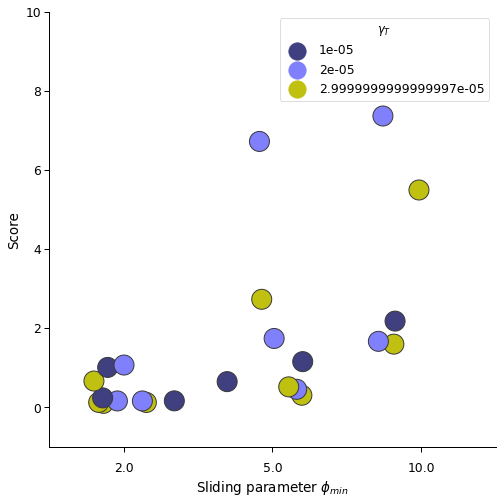

In [113]:
# plot total indicators for a given parameter
plt.clf()
plt.figure(figsize=(8,8))

highlight = "basal_yield_stress.mohr_coulomb.topg_to_phi.phi_min"
#highlight2 = 'ocean.pico.overturning_coefficent' 
highlight2 = 'ocean.pico.heat_exchange_coefficent'

#pp = sns.pairplot(pd.concat([total_3000,ensemble_table[highlight]], axis=1).dropna(axis=1,how='all'),
#                  hue=highlight)#,vars=['Amundsen Stream Velocity', 'Amundsen Thk Anomaly',
       #'Amundsen Grounded Area', 'Amundsen Floating Area',])#sorted(amundsen_indicators_2000.columns))

#plt.plot(pd.concat([total_3000, ensemble_table[highlight]],axis=1).dropna(axis=1,how='all'))
d=pd.concat([total_yr, ensemble_table_2],axis=1)#.dropna(axis=1,how='all')
#d.rename(columns={0: "score"})

#plt.scatter(d[highlight].values, d[0].values)
#d[highlight].values
g = sns.stripplot(x=highlight, y=0, hue=highlight2, 
                 data=d, size=20, jitter=0.35, palette=sns.color_palette("gist_stern", n_colors=3),
                 edgecolor='gray', linewidth=1)#, dodge=True)

leg = g.axes.get_legend()
leg.set_title(r'$\gamma_T$')

for lh in leg.legendHandles: 
    #lh.set_alpha(1)
    lh._sizes = [300] 
    
    

    
#sns.heatmap(d)
plt.ylabel('Score')
plt.xlabel('Sliding parameter $\phi_{min}$')
plt.ylim([-1,10])
#plt.yticks([0.5, 1.0, 1.5, 2.0])
#plt.xlabel('heat exchange coefficient')
#plt.legend(loc='right outside')

#plt.xlim([min(d[highlight].values), max(d[highlight].values) ])
#ensemble_table[highlight]
#plt.savefig('Figures/Ens_totalscore_'+ensemble_id+'_'+highlight+'_'+highlight+'.png')#, bbox_inches='tight')
#plt.savefig('Figures/Ens_totalscore_'+ensemble_id+'_'+highlight+'.pdf')#, bbox_inches='tight')

sns.despine()

plt.show()

<ipython-input-90-4ed172c51480>:83: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([0.0, 1.0, 2.0, 3.0], [0.0, 1.0, 2.0, '>3.0'])


<Figure size 1152x1008 with 0 Axes>

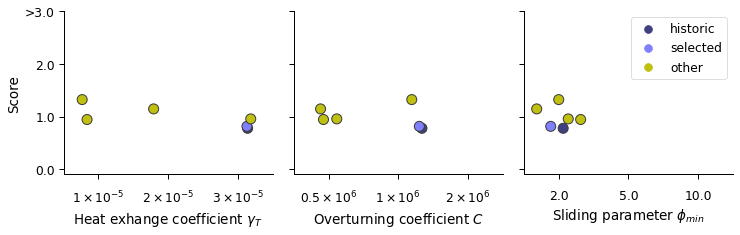

In [90]:
# plot total indicators for a given parameter
plt.clf()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3), sharey=True) # 12 by 12 cm
plt.subplots_adjust(wspace=0.1, hspace=0.1)

d=pd.concat([total_yr, ensemble_table_2],axis=1).dropna(axis=1,how='all')
d = d.rename(columns={0: "score"})
d['best'] = np.arange(0,len(d.index.values))
d.loc[d['best']>=2,'best'] = 2

# pico gamma_T 
ax = axes.flatten()[0]


highlight = "ocean.pico.heat_exchange_coefficent"
highlight2 = 'best' 

g = sns.stripplot(x=highlight, y='score', hue=highlight2, 
                 data=d, size=10, jitter=0.35, palette=sns.color_palette("gist_stern", n_colors=3),
                 edgecolor='gray', linewidth=1, ax = ax)#, dodge=True)

leg = g.axes.get_legend()
leg.remove()
    
#sns.heatmap(d)
ax.set_ylabel('Score')
ax.set_xlabel('Heat exhange coefficient $\gamma_{T}$')
ax.set_ylim([-0.1,3])
g.set(yticks=[0.0, 1.0, 2.0, 3.0])
g.set(yticklabels=[0.0, 1.0, 2.0, '>3.0'])
#ax.set_yticks([], [])

g.set(xticklabels=[r'$1\times 10^{-5}$', r'$2\times 10^{-5}$', r'$3\times 10^{-5}$'])
sns.despine()


# pico C
ax = axes.flatten()[1]


highlight = "ocean.pico.overturning_coefficent"
highlight2 = 'best' 

g = sns.stripplot(x=highlight, y='score', hue=highlight2, 
                 data=d, size=10, jitter=0.35, palette=sns.color_palette("gist_stern", n_colors=3),
                 edgecolor='gray', linewidth=1, ax = ax)#, dodge=True)

leg = g.axes.get_legend()
leg.remove()
ax.set_xlabel('Overturning coefficient $C$')
g.set(xticklabels=[r'$0.5\times 10^{6}$', r'$1\times 10^{6}$', r'$2\times 10^{6}$'])
ax.set_ylabel('')
sns.despine()



#
ax = axes.flatten()[2]

highlight = "basal_yield_stress.mohr_coulomb.topg_to_phi.phi_min"
highlight2 = 'best' 
#highlight2 = 'ocean.pico.heat_exchange_coefficent'

g = sns.stripplot(x=highlight, y='score', hue=highlight2, 
                 data=d, size=10, jitter=0.35, palette=sns.color_palette("gist_stern", n_colors=3),
                 edgecolor='gray', linewidth=1)#, dodge=True)

leg = g.axes.get_legend()
leg.set_title('')

#for lh in leg.legendHandles: 
#    #lh.set_alpha(1)
#    lh._sizes = [300] 
# replace labels
new_labels = ['historic', 'selected', 'other']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
    
    
#sns.heatmap(d)
ax.set_ylabel('')
ax.set_xlabel('Sliding parameter $\phi_{min}$')
ax.set_ylim([-0.1,3])
ax.set_yticks([0.0, 1.0, 2.0, 3.0], [0.0, 1.0, 2.0, '>3.0'])
#plt.xlabel('heat exchange coefficient')
#plt.legend(loc='right outside')

sns.despine()




plt.savefig('Ens_totalscore_'+ensemble_id+'.png', bbox_inches='tight')
plt.savefig('Ens_totalscore_'+ensemble_id+'.pdf', bbox_inches='tight')



plt.show()

Index(['Amundsen Stream Velocity', 'Ross Stream Velocity',
       'FRIS Stream Velocity', 'Total Stream Velocity', 'Amundsen Thk Anomaly',
       'Ross Thk Anomaly', 'FRIS Thk Anomaly', 'Total Thk Anomaly',
       'Total Grounded Area', 'Total Floating Area', 'Amundsen Grounded Area',
       'Amundsen Floating Area', 'Ross Grounded Area', 'Ross Floating Area',
       'FRIS Grounded Area', 'FRIS Floating Area', 'Total Grounding Line',
       'Amundsen Grounding Line', 'Ross Grounding Line',
       'FRIS Grounding Line'],
      dtype='object')
Index(['Amundsen Stream Velocity', 'Amundsen Thk Anomaly',
       'Amundsen Grounded Area', 'Amundsen Floating Area',
       'Amundsen Grounding Line'],
      dtype='object')
Index(['Ross Stream Velocity', 'Ross Thk Anomaly', 'Ross Grounded Area',
       'Ross Floating Area', 'Ross Grounding Line'],
      dtype='object')
ehash
7a241540    0.776560
NewOcean    0.813425
e4b3ad55    0.943409
b557e5f9    0.955154
43622ad7    1.144994
4ebb5440    1.3221

<ipython-input-81-5e6d76924485>:100: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([0.0, 1.0, 2.0, 3.0], [0.0, 1.0, 2.0, '>3.0'])


<Figure size 1152x1008 with 0 Axes>

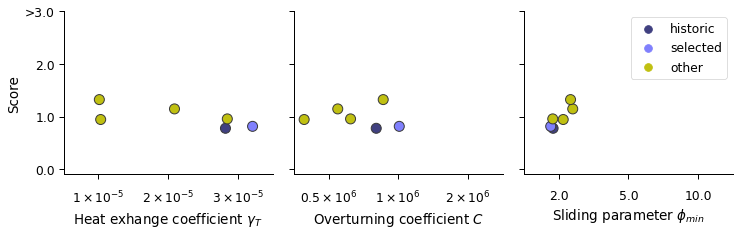

In [81]:
normalized_ens_indicator_yr = indicators_12000.div(indicators_12000.median(axis=0),axis=1)
normalized_ens_indicator_yr = normalized_ens_indicator_yr.sort_index(axis=0)

total_yr = get_best_total(normalized_ens_indicator_yr)
amundsen_yr = get_best_total(normalized_ens_indicator_yr,"Amundsen")
ross_yr = get_best_total(normalized_ens_indicator_yr, "Ross")
print(total_yr[0:10])
print(amundsen_yr[0:10])
print(ross_yr[0:10])

newocean = pd.DataFrame(ensemble_table.loc['7a241540']).transpose()
newocean.rename(index={'7a241540':'NewOcean'},inplace=True)
ensemble_table_2 = pd.concat([ensemble_table, newocean])


# plot total indicators for a given parameter
plt.clf()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3), sharey=True) # 12 by 12 cm
plt.subplots_adjust(wspace=0.1, hspace=0.1)

d=pd.concat([total_yr, ensemble_table_2],axis=1).dropna(axis=1,how='all')
d = d.rename(columns={0: "score"})
d['best'] = np.arange(0,len(d.index.values))
d.loc[d['best']>=2,'best'] = 2



# pico gamma_T 
ax = axes.flatten()[0]


highlight = "ocean.pico.heat_exchange_coefficent"
highlight2 = 'best' 

g = sns.stripplot(x=highlight, y='score', hue=highlight2, 
                 data=d, size=10, jitter=0.35, palette=sns.color_palette("gist_stern", n_colors=3),
                 edgecolor='gray', linewidth=1, ax = ax)#, dodge=True)

leg = g.axes.get_legend()
leg.remove()
    
#sns.heatmap(d)
ax.set_ylabel('Score')
ax.set_xlabel('Heat exhange coefficient $\gamma_{T}$')
ax.set_ylim([-0.1,3])
g.set(yticks=[0.0, 1.0, 2.0, 3.0])
g.set(yticklabels=[0.0, 1.0, 2.0, '>3.0'])
#ax.set_yticks([], [])

g.set(xticklabels=[r'$1\times 10^{-5}$', r'$2\times 10^{-5}$', r'$3\times 10^{-5}$'])
sns.despine()


# pico C
ax = axes.flatten()[1]


highlight = "ocean.pico.overturning_coefficent"
highlight2 = 'best' 

g = sns.stripplot(x=highlight, y='score', hue=highlight2, 
                 data=d, size=10, jitter=0.35, palette=sns.color_palette("gist_stern", n_colors=3),
                 edgecolor='gray', linewidth=1, ax = ax)#, dodge=True)

leg = g.axes.get_legend()
leg.remove()
ax.set_xlabel('Overturning coefficient $C$')
g.set(xticklabels=[r'$0.5\times 10^{6}$', r'$1\times 10^{6}$', r'$2\times 10^{6}$'])
ax.set_ylabel('')
sns.despine()



#
ax = axes.flatten()[2]

highlight = "basal_yield_stress.mohr_coulomb.topg_to_phi.phi_min"
highlight2 = 'best' 
#highlight2 = 'ocean.pico.heat_exchange_coefficent'

g = sns.stripplot(x=highlight, y='score', hue=highlight2, 
                 data=d, size=10, jitter=0.35, palette=sns.color_palette("gist_stern", n_colors=3),
                 edgecolor='gray', linewidth=1)#, dodge=True)

leg = g.axes.get_legend()
leg.set_title('')

#for lh in leg.legendHandles: 
#    #lh.set_alpha(1)
#    lh._sizes = [300] 
# replace labels
new_labels = ['historic', 'selected', 'other']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
    
    
#sns.heatmap(d)
ax.set_ylabel('')
ax.set_xlabel('Sliding parameter $\phi_{min}$')
ax.set_ylim([-0.1,3])
ax.set_yticks([0.0, 1.0, 2.0, 3.0], [0.0, 1.0, 2.0, '>3.0'])
#plt.xlabel('heat exchange coefficient')
#plt.legend(loc='right outside')

sns.despine()




plt.savefig('Ens_totalscore_'+ensemble_id+'_12ka.png', bbox_inches='tight')
plt.savefig('Ens_totalscore_'+ensemble_id+'_12ka.pdf', bbox_inches='tight')



plt.show()

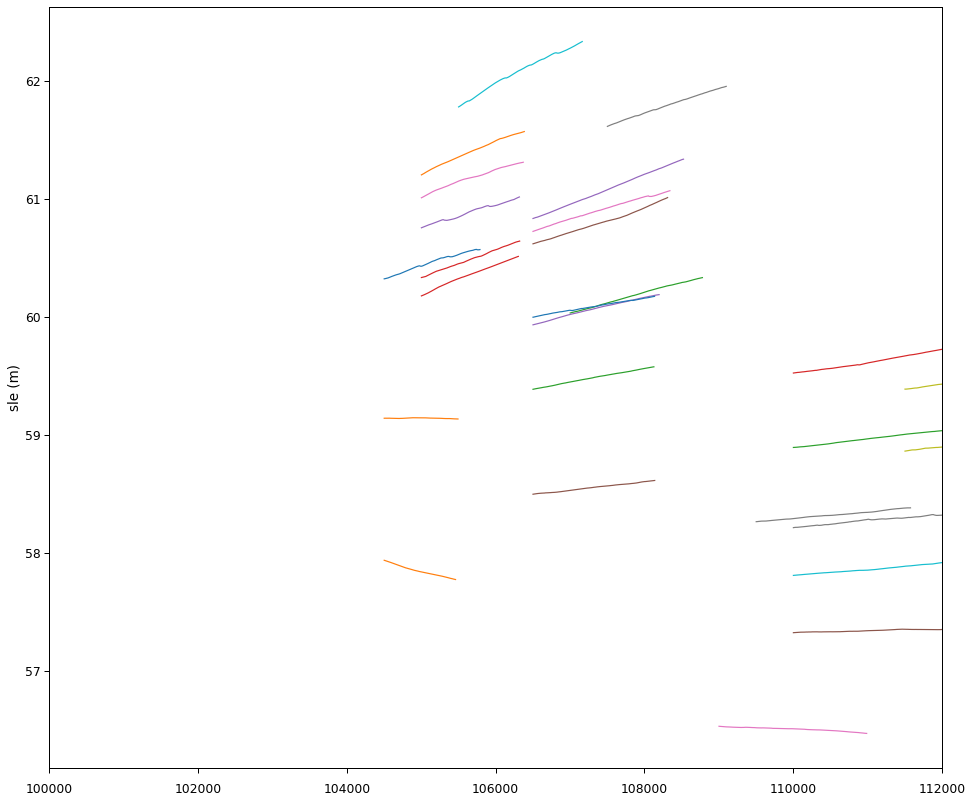

In [6]:
for i,em in enumerate(tsdata):
    #print(tsdata[em])
    if not(tsdata[em].empty):
        marker = None
        plt.plot(tsdata[em]["sea_level_rise_potential"]#.values#  
                 ,label=em, marker=marker)

plt.xlim([100000,112000])    
#plt.ylim([57.45, 57.6])
plt.ylabel('sle (m)')        
#plt.legend()
plt.show()

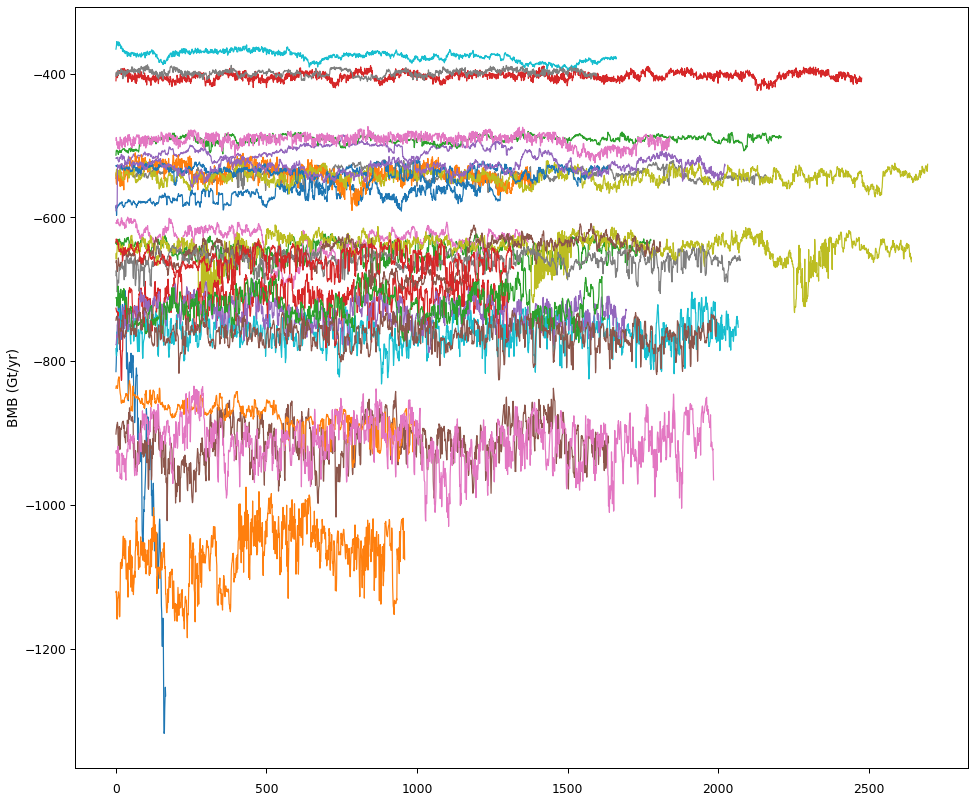

In [7]:
secpera=365*24*60*60
for i,em in enumerate(tsdata):
    #print(tsdata[em])
    if not(tsdata[em].empty):
        marker = None
        #     if "29122e40" in em: marker = "|"
        #plt.plot(tsdata[em].index,tsdata[em]["tendency_of_ice_mass_due_to_basal_mass_flux"]*secpera/1e12
        plt.plot(tsdata[em]["tendency_of_ice_mass_due_to_basal_mass_flux"].values#*secpera/1e12
                 ,label=em, marker=marker)
#plt.legend()
plt.ylabel('BMB (Gt/yr)')
#plt.xlim([1995, 2100])
plt.show()

In [82]:
total_yr

ehash
7a241540    0.776560
NewOcean    0.813425
e4b3ad55    0.943409
b557e5f9    0.955154
43622ad7    1.144994
4ebb5440    1.322142
96ef4d73    7.020446
0084991e         NaN
1289140d         NaN
1bc42213         NaN
25c07e5d         NaN
33521d6a         NaN
37520409         NaN
599ef7eb         NaN
6d1d00da         NaN
7771a44f         NaN
84064ed9         NaN
858c5e68         NaN
8c119642         NaN
a9024150         NaN
a9322a16         NaN
ac1dfeed         NaN
b239bbbf         NaN
b8136558         NaN
e2af1416         NaN
ebca421f         NaN
f10bf1e0         NaN
f6778fec         NaN
dtype: float64